# EMRI Waveforms in a nuthsell

Here you can find a pedagogical tutorial on creating Extreme Mass Ratio Inspiral (EMRI) waveforms. We will make an extensive use of the Fast EMRI Waveform (FEW) package [arxiv.org/2104.04582](https://arxiv.org/abs/2104.04582) [arxiv.org/2008.06071](https://arxiv.org/abs/2008.06071). The waveforms in this package combine a variety of separately accessible modules to form EMRI waveforms on both CPUs and GPUs. Generally, the modules fall into four categories: trajectory, amplitudes, summation, and utilities. Please see the [documentation](https://bhptoolkit.org/FastEMRIWaveforms/) for further information on these modules. The code and installation instructions can be found on Github [here](https://github.com/BlackHolePerturbationToolkit/FastEMRIWaveforms).

## What is an Extreme Mass Ratio Inspiral?

One of the primary sources for the future space-based gravitational wave detector, the Laser Interferometer Space Antenna, are the inspirals of small compact objects into massive black holes in the centers of galaxies. Such binaries are characterized by a small compact object of mass typically $\mu\in[1,100]M_\odot$ (for example a solar-mass black hole or a neutron star) inspiralling around a Massive Black Hole (MBH) of mass $M\in[10^5,10^7]M_\odot$. Due to their particularly small mass ratio $\epsilon = \mu / M \sim [10^{-4},10^{-6}]$ these systems are called Extreme Mass Ratio Inspiral (EMRI). Using perturbation theory in the mass ratio $\epsilon$ it is possible to model the evolution of the orbit of the compact object. On short time-scales (order of the orbital period), the compact object moves on geodesic orbits as if it was a test particles. However, on longer time-scales, it is necessary to take into account the impact of the gravitational field of the compact object on the background and the gravitational wave emission. During the inspiral, the compact object is slowly driven away from geodesic orbits and this deviation can be interpreted as an effective acceleration/force due to the so-called Gravitational [Self-Force](https://arxiv.org/abs/1805.10385).

Below, in the left panel, we show an example of a small compact object of ten solar masses inspiraling around a spinning MBH of $10^6$ solar masses. The duration of the animation corresponds to 8 hours. In the right panel, you can see the gravitational wave signal emmitted during this inspiral.

In [1]:
%%HTML
<video width="420" height="340" controls>
  <source src="EMRI_orbit.mp4" type="video/mp4">
</video>
<video width="420" height="340" controls>
  <source src="EMRI_waveform.mp4" type="video/mp4">
</video>

## EMRI Waveforms

EMRI waveforms are represented by the complex time-domain dimensionless strain $h(t) = h_+ - ih_\times$, where $h_+$ and $h_\times$ are the normal transverse-traceless gravitational wave polarizations. At a large distance from the source, $h$ is given by:
\begin{equation}\label{eq:main_wave}
    h = \frac{\mu}{d_L}\sum_{lmkn} A_{lmkn}(t) \, S_{lmkn}(\theta,\phi) \, \exp[-i\Phi_{mkn}(t)],
\end{equation}
where $t$ is the time of arrival of the gravitational wave at the solar system baricenter, $d_L$ is the luminosity distance, and $(l,m,k,n)$ are the indices describing the frequency-domain harmonic mode decomposition (or simply "harmonic" or "mode"):

- $l$ denotes the orbital angular momentum mode index and can take the value $l=2,3,...$

- $m$ denotes the azimuthal mode index and can take the values from $-l$ up to $l$. For example for l=2, $m=-2, -1, 0, 1, 2$.

- $k$ and $n$ denote the polar and radial mode indices and can take values from $-\infty$ up to $+\infty$. But in practice they are restriced to values around zero, for instance between $-30$ up to $30$

For LIGO sources, where the two objects have comparable masses, the strongest mode is the $(l=2,m=2,k=0,n=0)$.
See [Drasco and Hughes 2006](https://arxiv.org/abs/gr-qc/0509101) and [Hughes+ 2021](https://arxiv.org/pdf/2102.02713.pdf) for a derivation of the gravitational waveform.

Each harmonics is characterized by three important functions (these will be also different modules in the code):

1. The oscillatory part $\exp[-i\Phi_{mkn}(t)]$ is determined byt the phase $\Phi_{mkn}=m\Phi_\varphi + k \Phi_\theta + n\Phi_r$. The phases $\Phi_{\varphi,\theta,r}$ are determined solving for the EMRI trajectory, i.e. the following system of ordinary differential equations:
\begin{align}
    \frac{d}{dt}p &= \epsilon \, f_p(a, p, e, x_I) \\
    \frac{d}{dt}e &= \epsilon \, f_e(a, p, e, x_I) \\
    \frac{d}{dt}x_I &= \epsilon \, f_{x_I}(a, p, e, x_I) \\
    \frac{d}{dt}\Phi_{\varphi,\theta,r} &= \Omega_{\varphi, \theta, r}(a, p, e, x_I)/M 
\end{align}
with initial condition $\{\Phi_{\varphi0},\Phi_{\theta0},\Phi_{r0},p_0,e_0,x_{I0}\}$. The frequencies $\Omega_{r,\theta,\phi}$ describe the fundamental frequencies of a Kerr geodesic orbit and in the Newtonian limit they all converge to the Keplerian frequency. These frequencies are determined using the dimensionless spin of the MBH, $a$, and the quasi-Keplerian orbital parameters of $p$ (semi-latus rectum; hereafter separation), $e$ (eccentricity), and $\cos{I} \equiv x_I$ (cosine of the angle $I$ which describes the orbit's inclination from the equatorial plane). The rate of change of $p,e,x_I$ (left hand side of the first 3 equations) is obtained using the orbital-element fluxes $f_{p,e,x_I}$, which account for the gravitational wave emission, and the mass ratio $\epsilon = \mu/M$. For $\epsilon \rightarrow 0$ we reach the test-particle limit, and the orbital elements do not vay over time.


2. The amplitude $A_{lmkn}(t)$ which quantifies the size of each harmonic $(l,m,k,n)$. These are determined using the orbital parameters $A_{lmkn}(p(t), e(t), x_I(t))$.

![amplitude.pdf](amplitude.pdf)


3. The angular function $S_{lmkn}(\theta,\phi)$ which describes how the amplitude is modulated depending on the source-frame polar viewing angle $\theta$, the source-frame azimuthal viewing angle $\phi$. For Schwarzchild black holes these functions reduce to the spherical harmonics $Y_{lm}$.

### General Remarks
Notice the correspondence of the mode index with the three different degrees of freedom: $m\rightarrow \varphi$ (azimuthal), $k\rightarrow \theta$ (polar), $n\rightarrow r$ (radial). Each mode (or harmonic) is characterized by the mode frequency $\omega_{mkn}=m\Omega_\varphi + k \Omega_\theta + n \Omega_r$ which is the derivative of the phase $\Phi_{mkn}$. On short time-scales, the gravitational wave of an EMRI can be thought as a Fourier series with coefficients $\sum_l A_{lmnk} S_{lmkn}$ and frequencies $\omega_{mkn}$.

Theoretical parameter ranges:
- the eccentricity ranges between 0 and 1, for $e=0$ the orbits are circular;
- the inclination parameter ranges between -1 and 1, for $x_I=1$ the orbits are equatorial prograde, $x_I=-1$ the orbits are equatorial retrograde, $x_I=0$ the orbits are polar;
- the dimensionless spin parameters ranges between 0 and 1, for $a=0$ the central MBH is not spinning (Schwarzchild background) and the orbit of the compact object stays in the same plane, i.e. $x_I$ is constant.

See [Hughes+ 2021](https://ui.adsabs.harvard.edu/abs/2021PhRvD.103j4014H/abstract) for further discussion and more detailed definitions.  

## EMRI Parameter space

After we outlined the building blocks to create an EMRI waveform, let us now understand how these are organized in the Fast EMRI Waveform code. The waveform code takes as input two sets of parameters:
- the intrinsic parameters $(M,\mu,a,p_0,e_0,x_0,\Phi_{\varphi 0},\Phi_{\theta 0},\Phi_{r 0})$, which are used to construct the waveform in the source frame;
- the extrinsic parameters $(d_L,\theta_S,\phi_S,\theta_K,\phi_K)$, which define how the waveform is viewed in a given reference frame.

The intrinsic parameters are then passed into the trajectory module which computes the sparse time evolution of the phases $\Phi_{\varphi}(t),\Phi_{\theta}(t),\Phi_{r}(t)$ and orbital elements $p(t),e(t),x_I(t)$. The phases are used to assemble the oscillatory part, whereas the orbital elements are passed to the amplitude module which computes $A(p(t),e(t),x_I(t))$. The angular function is computed using the extrinsic parameters. Then the summation module (Waveform build) takes as input the functions $\exp[-i\Phi_{mkn}(t)], A_{lmkn}(t)$ and $S_{lmkn}(\theta,\phi)$ and outputs the waveform strain $h$.

![FEW_arch.pdf](FEW_arch.pdf)

In [2]:
# we import here all the modules and packages we need
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from few.trajectory.inspiral import EMRIInspiral
from few.amplitude.romannet import RomanAmplitude
from few.amplitude.interp2dcubicspline import Interp2DAmplitude
from few.waveform import FastSchwarzschildEccentricFlux, SlowSchwarzschildEccentricFlux, GenerateEMRIWaveform
from few.utils.utility import (get_overlap, 
                               get_mismatch, 
                               get_fundamental_frequencies, 
                               get_separatrix, 
                               get_mu_at_t, 
                               get_p_at_t, 
                               get_kerr_geo_constants_of_motion,
                               xI_to_Y,
                               Y_to_xI)

from few.utils.ylm import GetYlms
from few.utils.modeselector import ModeSelector
from few.summation.interpolatedmodesum import CubicSplineInterpolant
from few.waveform import SchwarzschildEccentricWaveformBase
from few.summation.interpolatedmodesum import InterpolatedModeSum
from few.summation.directmodesum import DirectModeSum
from few.utils.constants import *
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase

use_gpu = False

# keyword arguments for inspiral generator (RunSchwarzEccFluxInspiral)
inspiral_kwargs={
        "DENSE_STEPPING": 0,  # we want a sparsely sampled trajectory
        "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
    }

# keyword arguments for inspiral generator (RomanAmplitude)
amplitude_kwargs = {
    "max_init_len": int(1e3),  # all of the trajectories will be well under len = 1000
    "use_gpu": use_gpu  # GPU is available in this class
}

# keyword arguments for Ylm generator (GetYlms)
Ylm_kwargs = {
    "assume_positive_m": False  # if we assume positive m, it will generate negative m for all m>0
}

# keyword arguments for summation generator (InterpolatedModeSum)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

## Schwarzschild Eccentric Waveforms
In this tutorial we will restrict to EMRI systems in which the central object is a non-spinning black hole. The case of a spinning black hole is presented at the end of the notebook in the additional materials.

## Trajectory Module
The trajectory module generates orbital and phase trajectories for an EMRI orbit:  

\begin{equation}
p(t), e(t), x_I(t), \Phi_\varphi(t), \Phi_\theta(t), \Phi_r(t)
\end{equation}

with inputs $M, \mu, p_0, e_0, \iota_0, \Phi_{\varphi0}, \Phi_{\theta0}, \Phi_{r 0}$. The trajectory is evolved for `T` years. If the specified duration is longer than the trajectory, the trajectory is generated until the last stable orbit, also called separatrix.

$M$ is the larger mass ($M_\odot$), $\mu$ is the compact object mass ($M_\odot$), $p_0$ is the initial semi-latus rectum (dimensionless), $e_0$ is the initial eccentricity, and the final three are the initial phases $\Phi_{\varphi 0}, \Phi_{\theta 0}, \Phi_{r 0}$. For Schwarzchild black holes the spin parameter is zero $a=0$, the orbit remains in the same plane $x_I=1$, and the separatrix is located at $p_\textrm{sep} = 6+2e$.

### Run a basic trajectory

In [3]:
# initialize trajectory class
traj = EMRIInspiral(func="SchwarzEccFlux")

In [4]:
# set initial parameters
M = 1e6
mu = 1e1
p0 = 10.0 # range [separatrix, 45]
e0 = 0.3 # range [0.0, 0.7]

# run trajectory
# must include for generic inputs, will fix a = 0 and x = 1.0
a = 0.0
x = 1.0

# additional information 
kwargs = dict(dt=10.0, # initial time setp, 
              T=4.0, # Time duration in years
              err=1e-10 # integrator error
             )

t, p, e, xI, Phi_phi, Phi_theta, Phi_r = traj(M, mu, a, p0, e0, x,
                                              Phi_phi0=0.0,
                                              Phi_theta0=0.0,
                                              Phi_r0=0.0,
                                              **kwargs)

# get adimensional fundamental frequencies
OmegaPhi, OmegaTheta, OmegaR = get_fundamental_frequencies(a, p, e, x)

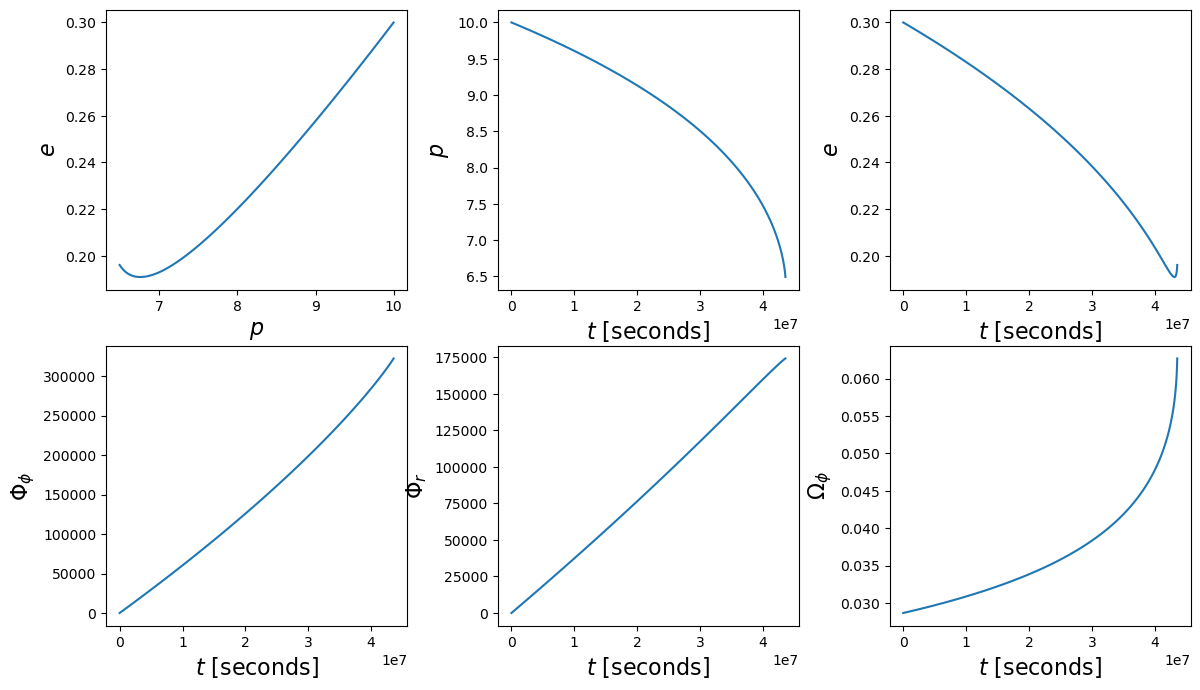

In [5]:
fig, axes = plt.subplots(2, 3)
plt.subplots_adjust(wspace=0.3)
fig.set_size_inches(14, 8)
axes = axes.ravel()

ylabels = [r'$e$', r'$p$', r'$e$', r'$\Phi_\phi$', r'$\Phi_r$', r'$\Omega_\phi$']
xlabels = [r'$p$', r'$t$ [seconds]', r'$t$ [seconds]', r'$t$ [seconds]', r'$t$ [seconds]', r'$t$ [seconds]', r'$t$ [seconds]', r'$t$ [seconds]']
ys = [e, p, e, Phi_phi, Phi_r, OmegaPhi]
xs = [p, t, t, t, t, t]

for i, (ax, x, y, xlab, ylab) in enumerate(zip(axes, xs, ys, xlabels, ylabels)):
    ax.plot(x, y)
    ax.set_xlabel(xlab, fontsize=16)
    ax.set_ylabel(ylab, fontsize=16)

We want to remark that $p$ and $e$ are quasi-Keplerian parameters and gauge dependent quantities (dependent on the coordinate system). They "converge" to the Newtonian equivalent parameters in the weak field regime. Below we show a plot of ellipsis based on these parameters at diferent stages of the evolution. This is useful to get a sense of the evolution of the orbit but you should not interpret these ellipsis as real orbits!

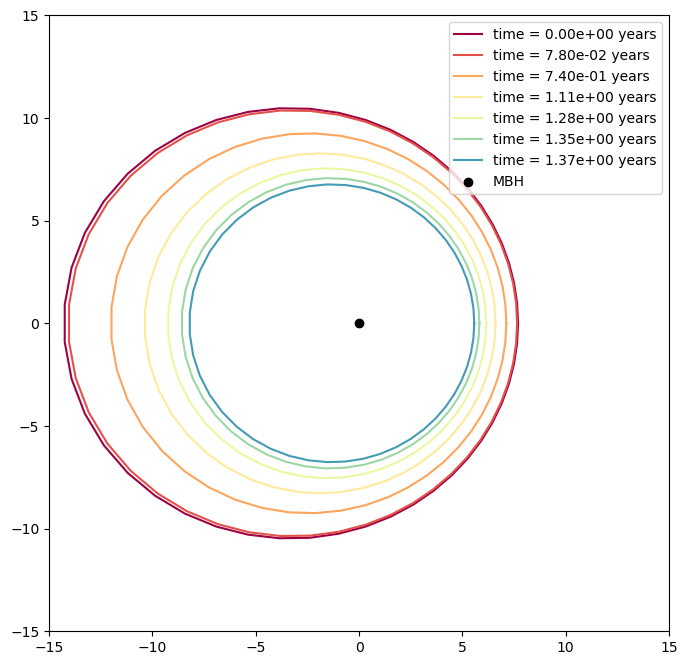

In [6]:
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')

plt.figure(figsize=(8,8))
for ii in range(0,len(p),15):
    pp = p[ii]
    ee = e[ii]
    Csi = np.linspace(0.0,2*np.pi)
    rr = pp / (1 + ee * np.cos(Csi))
    xx = rr * np.cos(Csi)
    yy = rr * np.sin(Csi)
    plt.plot(xx,yy,c=cmap(ii/len(p)),label=f'time = {t[ii]/(YRSID_SI):.2e} years' )
plt.scatter(0,0,c='k',label='MBH')
plt.legend()
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()

## Evolution of semi-latus rectum and eccentricity

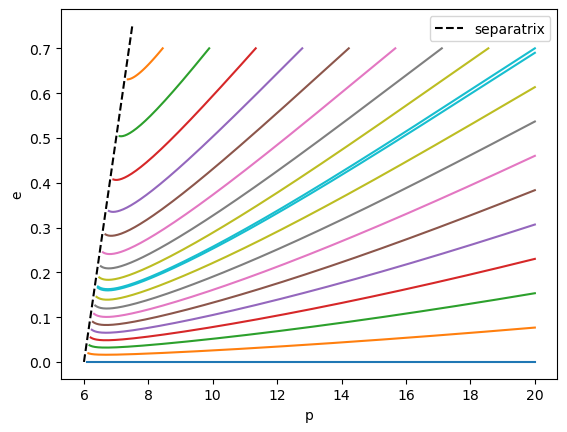

In [7]:
# set initial parameters
M = 1e6
mu = 1e1

# run trajectory
# must include for generic inputs, will fix a = 0 and x = 1.0
a = 0.0
x = 1.0

# additional information 

kwargs = dict(dt=10.0, # initial time setp, 
              T=400.0, # Time duration in years
              err=1e-10 # integrator error
             )

p0 = 10.0 # range [separatrix, 45]
e0 = 0.3 # range [0.0, 0.7]

plt.figure()
for p0 in np.linspace(7, 20, num=10):
    e0=0.7
    t, p, e, xI, Phi_phi, Phi_theta, Phi_r = traj(M, mu, a, p0, e0, x,
                                              Phi_phi0=0.0,
                                              Phi_theta0=0.0,
                                              Phi_r0=0.0,
                                              **kwargs)
    plt.plot(p,e)

for e0 in np.linspace(0, 0.69, num=10):
    p0=20.0
    t, p, e, xI, Phi_phi, Phi_theta, Phi_r = traj(M, mu, a, p0, e0, x,
                                              Phi_phi0=0.0,
                                              Phi_theta0=0.0,
                                              Phi_r0=0.0,
                                              **kwargs)
    plt.plot(p,e)

pp = np.linspace(6,7.5)
ecc = (pp - 6)/2
plt.plot(pp,ecc,'k--',label='separatrix')
plt.xlabel('p')
plt.ylabel('e')
plt.legend()
plt.show()


### Number of cycles and differences between trajectories
It is often common to introduce the number of cycles $\mathcal{N}_\varphi (t)= \Phi_\varphi(t)/(2\pi)$ to quantify the number of times the compact object orbits aroun the MBH. This is useful to quantify the difference between trajectories.

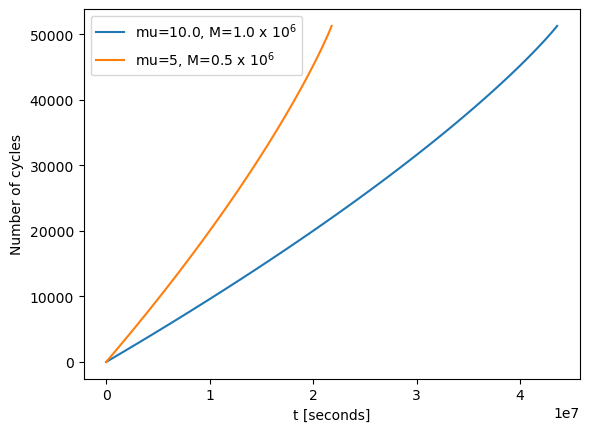

In [8]:
# run trajectory
# must include for generic inputs, will fix a = 0 and x = 1.0
a = 0.0
x = 1.0
p0 = 10.0 # range [separatrix, 45]
e0 = 0.3 # range [0.0, 0.7]

# set initial parameters
M = 1e6
mu = 1e1

t, p, e, xI, Phi_phi, Phi_theta, Phi_r = traj(M, mu, a, p0, e0, x,
                                              Phi_phi0=0.0,
                                              Phi_theta0=0.0,
                                              Phi_r0=0.0,
                                              **kwargs)

M2 = 5e5
mu2 = 5
t2, p2, e2, xI2, Phi_phi2, Phi_theta2, Phi_r2 = traj(M2, mu2, a, p0, e0, x,
                                              Phi_phi0=0.0,
                                              Phi_theta0=0.0,
                                              Phi_r0=0.0,
                                              **kwargs)

plt.figure()
plt.plot(t,Phi_phi/(2*np.pi), label=f'mu={mu}, M={M/1e6} x $10^6$') 
plt.plot(t2,Phi_phi2/(2*np.pi), label=f'mu={mu2}, M={M2/1e6} x $10^6$')
plt.ylabel('Number of cycles')
plt.xlabel('t [seconds]')
plt.legend()
plt.show()

The two systems have the same mass ratio and the same final number of cycles. However, the number of cycles accumulated per second is different. An EMRI system with larger MBH "more slowly" than a system with smaller `M`.  Notice that the frequencies are related to the time derivative of the number of cycles
$$
\frac{d}{dt} \mathcal{N}_\varphi = \frac{1}{2 \pi}\frac{d}{dt} \Phi_\varphi = \frac{1}{2 \pi} \Omega_\varphi
$$

## Exercise 2
Plot the FINAL number of cycles (`Ncycle.append(Phi_phi[-1]/(2*np.pi))`) for different mass ratios.

In [9]:
# your turn ;)

### Fundamental frequencies and harmonics

An EMRI Waveform can thought as a Fourier series where the frequencies $\omega_{mnk}$ are given by
$$
\omega_{mnk} = m \Omega_\varphi + n \Omega_r + k \Omega_\theta
$$
Therefore is possible to plot the frequency evolution of each harmonic given a trajectory. This can be useful to understand which frequency range each harmonic spans.

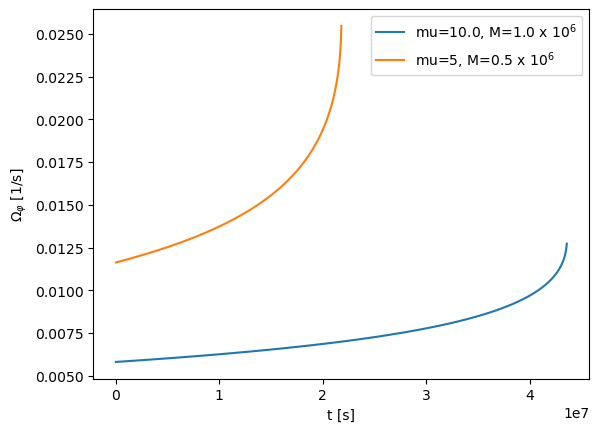

In [10]:
# run trajectory
# must include for generic inputs, will fix a = 0 and x = 1.0
a = 0.0
x = 1.0
p0 = 10.0 # range [separatrix, 45]
e0 = 0.3 # range [0.0, 0.7]

# set initial parameters
M = 1e6
mu = 1e1

t, p, e, xI, Phi_phi, Phi_theta, Phi_r = traj(M, mu, a, p0, e0, x,
                                              Phi_phi0=0.0,
                                              Phi_theta0=0.0,
                                              Phi_r0=0.0,
                                              **kwargs)
# get the fundamental frequencies
OmegaPhi, OmegaTheta, OmegaR = get_fundamental_frequencies(a, p, e, x)

M2 = 5e5
mu2 = 5
t2, p2, e2, xI2, Phi_phi2, Phi_theta2, Phi_r2 = traj(M2, mu2, a, p0, e0, x,
                                              Phi_phi0=0.0,
                                              Phi_theta0=0.0,
                                              Phi_r0=0.0,
                                              **kwargs)
OmegaPhi2, OmegaTheta2, OmegaR2 = get_fundamental_frequencies(a, p2, e2, x)

plt.figure()
# we need to divide by the total Mass and convert to seconds
plt.plot(t,OmegaPhi / (M * MTSUN_SI) , label=f'mu={mu}, M={M/1e6} x $10^6$') 
plt.plot(t2,OmegaPhi2/ (M2 * MTSUN_SI), label=f'mu={mu2}, M={M2/1e6} x $10^6$')
plt.ylabel(r'$\Omega_\varphi$ [1/s]')
plt.xlabel('t [s]')
plt.legend()
plt.show()

The system with smaller MBH mass spans more frequencies and evolves more quickly than the system with larger MBH mass.

## Schwarzchild Waveforms in the source frame
Here we show how to get the final waveform using the input parameters.

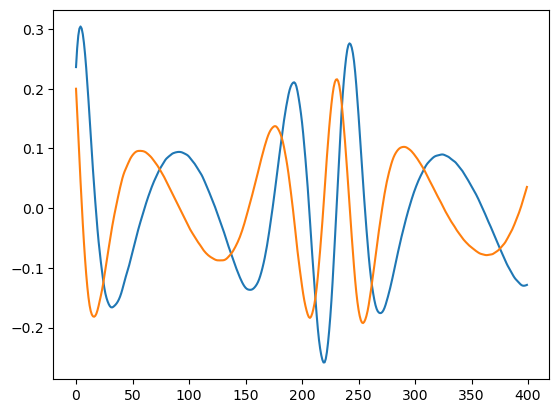

In [11]:
few_gen = FastSchwarzschildEccentricFlux(
    inspiral_kwargs=inspiral_kwargs,
    amplitude_kwargs=amplitude_kwargs,
    Ylm_kwargs=Ylm_kwargs,
    sum_kwargs=sum_kwargs,
    use_gpu=use_gpu,
)

# parameters
M = 1e6
mu = 1e2
p0 = 12.0
e0 = 0.4
theta = np.pi/3  # polar viewing angle in source frame
phi = np.pi/4  # azimuthal viewing angle in source frame
dt = 10.0

wave = few_gen(M, mu, p0, e0, theta, phi,Phi_phi0=0.0,  dt=dt, T=0.01)  #  assumes dt = 10.0 for max T = 0.01 year

plt.figure()
plt.plot(wave.real[:400])
plt.plot(wave.imag[:400])
plt.show()

## EMRI Waveforms in different domains
The output of FEW is a time domain waveform, i.e. the dimensionless strain as a function of time. We are working on providing waveforms directly in Fourier and Time-Frequency domain.

In [12]:
# parameters
M = 1e6
mu = 1e2
p0 = 12.0
e0 = 0.0
theta = np.pi/3  # polar viewing angle in source frame
phi = np.pi/4  # azimuthal viewing angle in source frame
dt = 10.0
# notice that we are providing the distance parameter
wave = few_gen(M, mu, p0, e0, theta, phi, dist=1.0, dt=dt, T=1.0)  #  assumes dt = 10.0 for max T = 1.0 year
time = np.arange(0, len(wave))*dt

## Time Domain

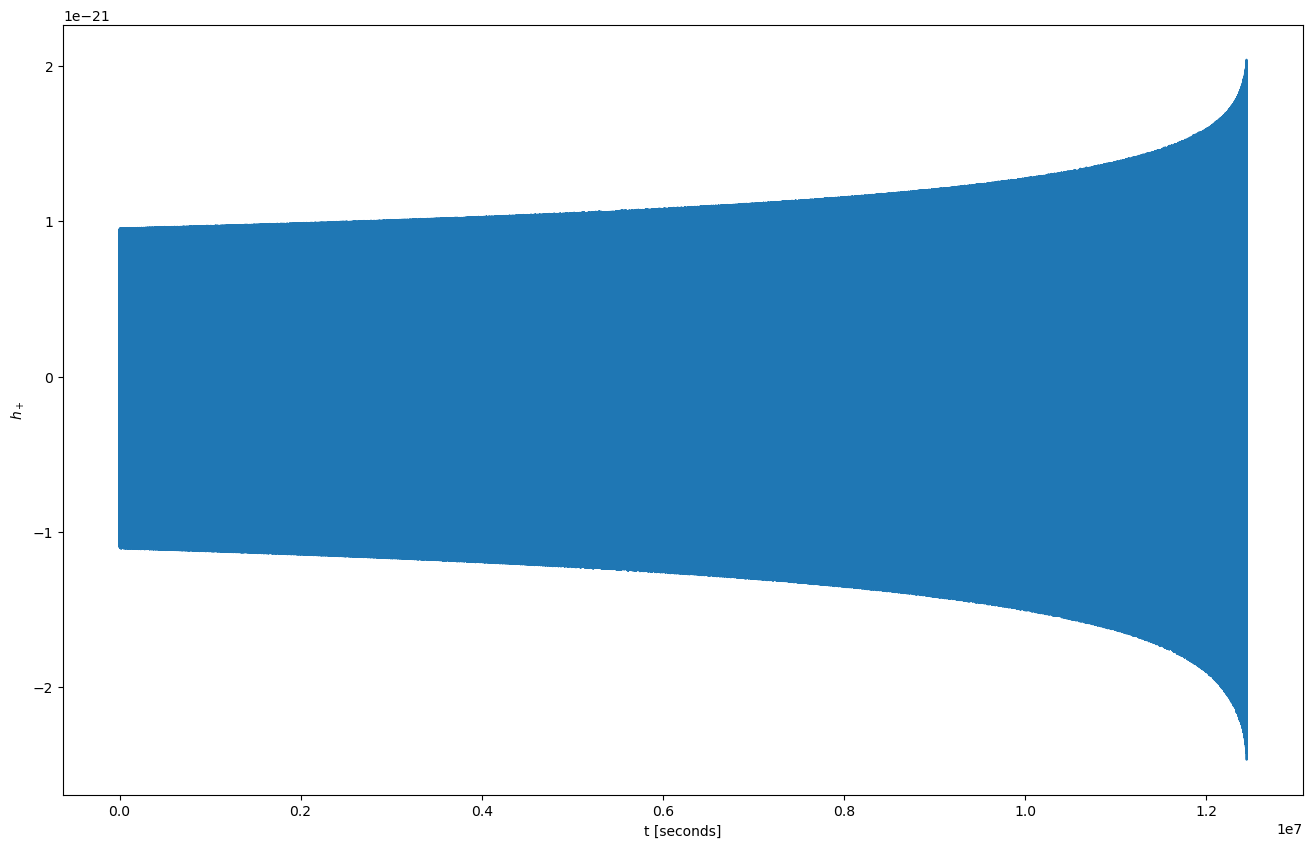

In [13]:
plt.figure(figsize=(16,10))
plt.plot(time, wave.real)
plt.ylabel(r'$h_+$')
plt.xlabel('t [seconds]')
plt.show()

## Fourier Domain

In [14]:
# load Power Spectral Density of LISA. This represents how loud the instrumental noise is.
noise = np.genfromtxt("LPA.txt", names=True)
f, PSD = (
    np.asarray(noise["f"], dtype=np.float64),
    np.asarray(noise["ASD"], dtype=np.float64) ** 2,
)

# here we use a cubic spline to interpolate the PSD
sens_fn = CubicSplineInterpolant(f, PSD, use_gpu=False)

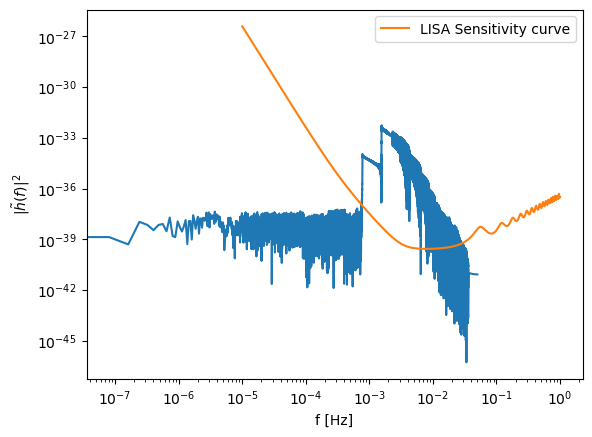

In [15]:
# we take the Fast Fourier transform of the signal
hp_fft = np.fft.rfft(wave.real)*dt
hx_fft = -np.fft.rfft(wave.imag)*dt

freq = np.fft.rfftfreq(len(wave),dt)
plt.figure()
plt.loglog(freq, np.abs(hx_fft)**2)
plt.plot(f, PSD,label='LISA Sensitivity curve')
plt.legend()
plt.ylabel(r'$|\tilde{h}(f)|^2$')
plt.xlabel('f [Hz]')
plt.show()

We define the inner product:
$$
<{a (t)}|{b (t)}> =4 \Re \int _{0} ^\infty \frac{\tilde{a} ^* (f) \tilde{b} (f) }{S_n (f)} \, {\rm d} f \, .
$$
where the tilde indicates the Fourier transform, the symbol $^*$ indicates the complex conjugation, and $S_n (f)$ is the one-sided noise power spectral density, which can be interpreted as the size of the root mean square fluctuations at a given frequency $\Delta n _{\text{rms}} \sim \sqrt{S_n(f) \Delta f}$. From a practical point of view the spectral density represents our information on the detector sensitivity and the aforementioned inner product can be used to quantify the Signal to Noise Ratio (SNR) of a waveform $h(t)$:
$$
{\rm SNR}^2 =<{h (t)}|{h (t)}> =4 \Re \int _{0} ^\infty \frac{|\tilde{h} (f)| }{S_n (f)} \, {\rm d} f \, .
$$
EMRIs are usually considered to be detectable for SNR>20

In [16]:
def inner_product(a,b,dt):
    a_tilde = np.fft.rfft(a)*dt
    b_tilde = np.fft.rfft(b)*dt
    freq = np.fft.rfftfreq(len(a),dt)
    df = freq[1]-freq[0]
    psd_f = sens_fn(freq)
    return 4.0 * np.real ( np.sum( np.conj(a_tilde) * b_tilde * df / psd_f) )

# the SNR of the previous waveform is
SNR = np.sqrt(inner_product(wave.real,wave.real,dt))
print("SNR =",SNR)

SNR = 115.1163351387037


/Users/lorenzosperi/anaconda3/envs/few_env/lib/python3.7/site-packages/few-1.4.11-py3.7-macosx-10.9-x86_64.egg/few/summation/interpolatedmodesum.py:202: UserWarning: New t array outside bounds of input t array. These points are filled with edge values.
  "New t array outside bounds of input t array. These points are filled with edge values."


### Exercise
Verify that the SNR of an EMRI waveform is:
- inversely proportional to the distance
- directly proportional to the secondary mass `mu` for fixed total Mass and duration. Make sure that the source does not plung before the times provided. Otherwise, you might not get the direct proportionality, i.e. set T=`0.001` and vary $\mu\in[10,100]$.


In [17]:
# your turn

We introduce now another quantity which will be useful for estimating how different two waveforms $a(t)$ and $b(t)$ are: the Overlap $\mathcal{O}(a,b)$: 
$$
\mathcal{O} (a,b) = \frac{<{a}|{b}>}{\sqrt{<{a}|{a}>} \sqrt{<{b}|{b}>}} \in [-1,1] \, .
$$
The overlap expresses how similar two signals $a$ and $b$ by weighting the product with the power spectral density of the detector $S_n (f)$. If two signals are identical then the overlap is 1. Another quantity often used in gravitational wave data analysis is the mismatch which is defined as 1 minus the overlap.

In [18]:
def overlap(a,b,dt):
    a_b = inner_product(a,b,dt)
    a_a = inner_product(a,a,dt)
    b_b = inner_product(b,b,dt)
    return a_b / np.sqrt(a_a * b_b)

print("overlap of a signal with itself = ",overlap(wave.real,wave.real,dt))

overlap of a signal with itself =  1.0


In [19]:
# parameters
M = 1e6
mu = 1e2
p0 = 12.0
e0 = 0.4
theta = np.pi/3  # polar viewing angle in source frame
phi = np.pi/4  # azimuthal viewing angle in source frame
dt = 10.0

base_sig = few_gen(M, mu, p0, e0, theta, phi, dist=1.0, dt=dt, T=0.01)

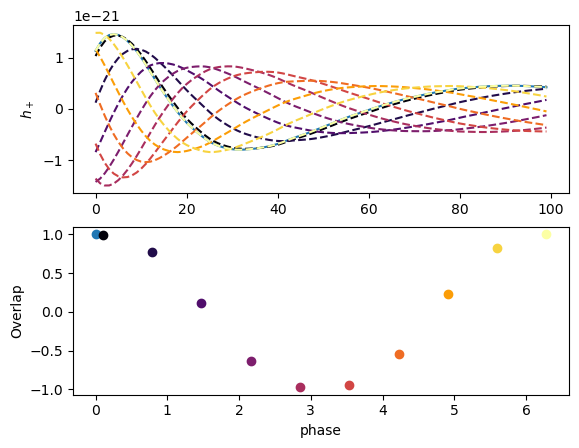

In [20]:
cmap = matplotlib.cm.get_cmap('inferno')
fig, axs = plt.subplots(2, 1)
axs[0].plot(base_sig.real[:100])
axs[1].scatter(0.0, 1)
axs[1].set_xlabel('phase')
axs[1].set_ylabel('Overlap')
axs[0].set_ylabel('$h_+$')
for phase in np.linspace(0.1, 2*np.pi,num=10):
    wave = few_gen(M, mu, p0, e0, theta, phi, dist=1.0, dt=dt, T=0.01) * np.exp(1j*phase)
    O = overlap(base_sig.real,wave.real,dt)
    axs[0].plot(wave.real[:100],'--', color= cmap(phase/(np.pi*2)))
    axs[1].scatter(phase, O, color= cmap(phase/(np.pi*2)))

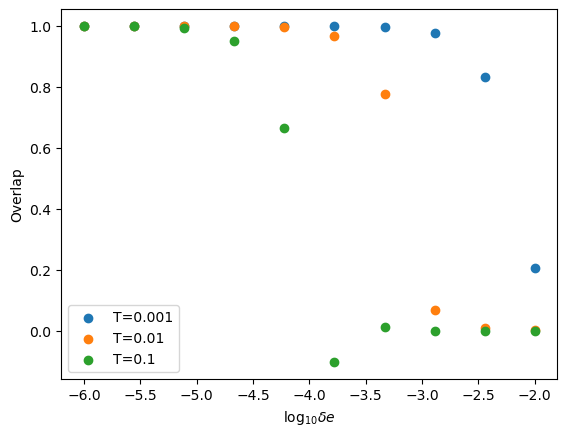

In [21]:
# parameters
M = 1e6
mu = 1e2
p0 = 12.0
e0 = 0.4
theta = np.pi/3  # polar viewing angle in source frame
phi = np.pi/4  # azimuthal viewing angle in source frame
dt = 10.0
T = 0.01

cmap = matplotlib.cm.get_cmap('inferno')
fig, axs = plt.subplots(1, 1)
axs.set_xlabel('$\log_{10}\delta e$')
axs.set_ylabel('Overlap')
vec = 10**np.linspace(-6, -2,num=10)
logd = np.log10(vec)

for T in [0.001, 0.01, 0.1]:
    base_sig = few_gen(M, mu, p0, e0, theta, phi, dist=1.0, dt=dt, T=T)
    O=[]    
    for delta in vec:
        wave = few_gen(M, mu, p0, e0*(1+delta), theta, phi, dist=1.0, dt=dt, T=T)
        O.append(overlap(base_sig.real,wave.real,dt))

    axs.scatter(logd, O , label=f'T={T}')

plt.legend()
plt.show()

### Exercise
Repeat the previous plot by varying each of the EMRI parameters. Which parameter makes the overlap drop faster?

In [22]:
# your turn

## Time-Frequency Domain

In [23]:
# parameters
M = 1e6
mu = 1e2
p0 = 12.0
e0 = 0.0
theta = np.pi/3  # polar viewing angle in source frame()
phi = np.pi/4  # azimuthal viewing angle in source frame
dt = 10.0

wave = few_gen(M, mu, p0, e0, theta, phi, dist=1.0, dt=dt, T=1.0)

In [24]:
from scipy import signal
# short fourier transform of the signal
f, t, Zxx = signal.stft(wave.real, 1/dt, nperseg=5000)

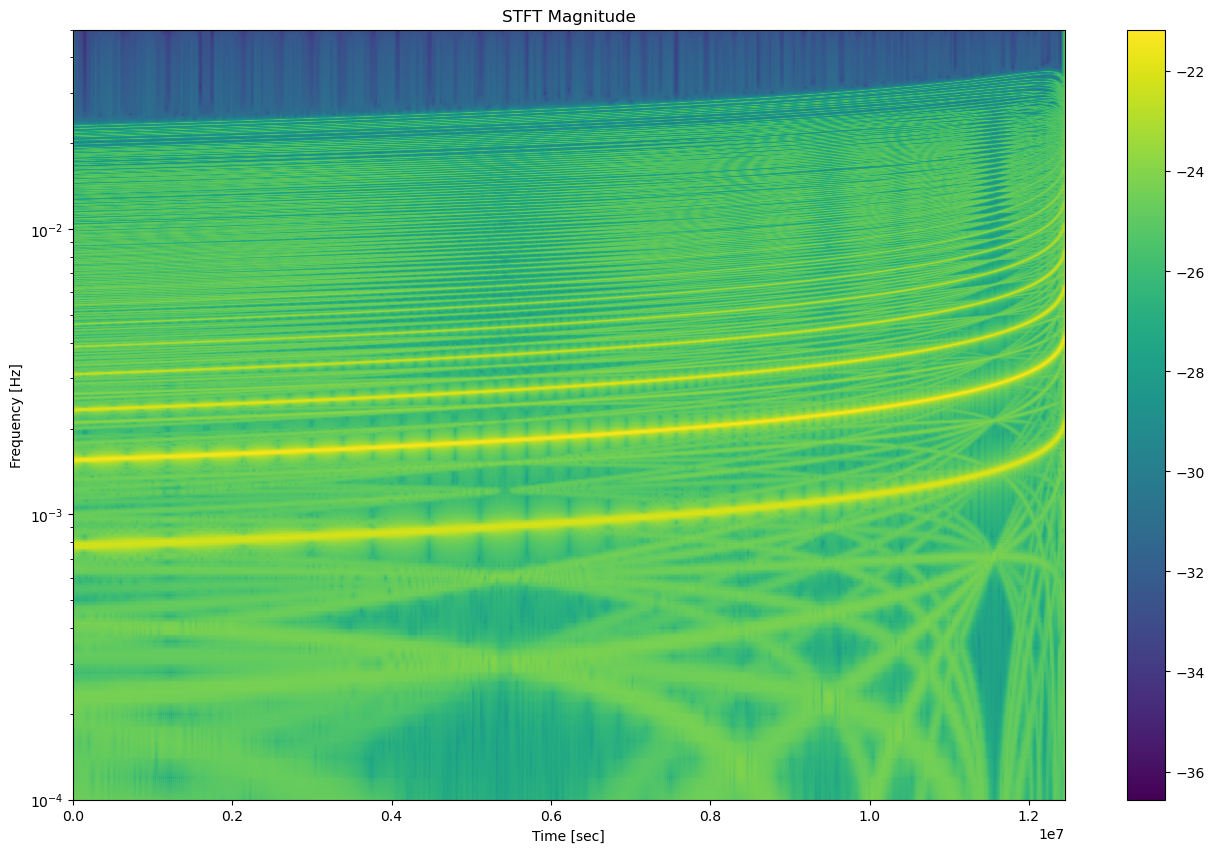

In [25]:
plt.figure(figsize=(16,10))
cb = plt.pcolormesh(t, f, np.log10(np.abs(Zxx)), shading='gouraud')
plt.colorbar(cb,)
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.yscale('log')
plt.ylim([1e-4, f[-1]])
plt.show()

### Exercise 7
In the previous plot the different harmonics of the waveform can be recognized as tracks in time-frequency space. As exercise, try to plot the frequency tracks as a function of time on top of the previous plot. Take the same input parameters and run a trajectory to obtain the `p` and `e` evolution. Then pass these arrays into the the function `get_fundamental_frequencies` and obtain the three fundamental frequencies. Then convert to the correct units and plot the frequency $f=(m \Omega_\varphi + n \Omega_r)/(2\pi)$ for some values of your choice for $m$ and $n$.

In [26]:
# your turn

# Creating  modules

In addition to using our built-in modules and waveforms, you can easily create your own module or waveform. Below is an example of creating your own trajectory module and using it in a custom waveform. If you can get a reasonably fast trajectory from your specific brand of EMRI physics, you can be generating waveforms in no time! Please see the [documentation](https://mikekatz04.github.io/FastEMRIWaveforms/) on this for more details on the constructions behind this. 

**Important Note**: If you do use this package to examine EMRI analysis problems, please contact the authors of this code (see docs) about possible collaboration and/or contribution.

### Post-Newtonian trajectory

The example will be to implement a Post-Newtonian trajectory in a Schwarzschild eccentric waveform. This will be done purely in Python. However, most of our modules have backends in C/C++/CUDA for maximum efficiency. If you have a trajectory in python and want to see if it can be ported for speed, please contact the authors.

To get started, we will import an integrator ([DOP853](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.DOP853.html#scipy.integrate.DOP853)) and a library for elliptical integrals that mirrors the mathematica format `mpmath`. You can run: 

```
pip install mpmath
```

in your conda environment to attain that library. 

We will also import necessary things from our package. This includes constants from `few.utils.constants`, as well as two base classes to be inherited by the new module. 

The first base class is [SchwarzschildEccentric](https://mikekatz04.github.io/FastEMRIWaveforms/html/user/main.html#few.utils.baseclasses.SchwarzschildEccentric) base class that passes information specific to any Schwarzschild eccentric waveform (number of modes, (l,m,n) sets, etc.). It also has methods for general sanity checks in these limits for input parameters, trajectories, and other things. You can see the documentation for more detail on its properties. 

The other base class is [TrajectoryBase](file:///Users/michaelkatz/Research/FastEMRIWaveforms/docs/html/user/traj.html#few.utils.baseclasses.TrajectoryBase). This houses both information for trajectory modules, as well as the interface that should be common to all trajectory modules (i.e. [__call__](https://mikekatz04.github.io/FastEMRIWaveforms/html/user/traj.html?highlight=trajectorybase#few.utils.baseclasses.TrajectoryBase.__call__) function). It allows for flexible parameter calling interfaces, but ensures the strict interface will be the same for all trajectory modules. Trajectory modules must implement the method [get_inspial](https://mikekatz04.github.io/FastEMRIWaveforms/html/user/traj.html?highlight=trajectorybase#few.utils.baseclasses.TrajectoryBase.get_inspiral). The common interface uses this to generate the specific trajectory. 

This is a common theme amongst module and waveform creation. The user will take one parent abstract base class related to the waveform limits, domain of validity, and its waveform properties, and one parent abstract based class for the module type (like trajectory or summation). 

In [27]:
!pip install mpmath

In [28]:
# we need to import an integrator and elliptic integrals
from mpmath import *
from scipy.integrate import DOP853

# base classes
from few.utils.baseclasses import TrajectoryBase
from few.utils.baseclasses import SchwarzschildEccentric

# settings for elliptic integrals
mp.dps = 25
mp.pretty = True

# constants from our package
from few.utils.constants import MTSUN_SI, YRSID_SI, Pi

# for common interface with C/mathematica
def Power(x, n):
    return x**n

def Sqrt(x):
    return np.sqrt(x)

# this is class object just to hold epsilon as it steps
# this class is instantiated and then run like the derivative function in the integrator (ex. dydt)
class PN:
    def __init__(self, epsilon, *args):
        self.epsilon = epsilon
        self.par = args[0] # additional parameter

    def __call__(self, t, y):

        # mass ratio
        epsilon = self.epsilon

        # extract the four evolving parameters
        p, e, Phi_phi, Phi_r = y

        
        # guard against bad integration steps
        if e >= 1.0 or e < 1e-6 or p < 6.0 or (p - 6 - 2* e) < 0.1:
            return [0.0, 0.0, 0.0, 0.0]
        
        # perform elliptic calculations
        EllipE = ellipe(4*e/(p-6.0+2*e))
        EllipK = ellipk(4*e/(p-6.0+2*e))
        EllipPi1 = ellippi(16*e/(12.0 + 8*e - 4*e*e - 8*p + p*p), 4*e/(p-6.0+2*e))
        EllipPi2 = ellippi(2*e*(p-4)/((1.0+e)*(p-6.0+2*e)), 4*e/(p-6.0+2*e))

        # Azimuthal frequency
        Omega_phi = (2*Power(p,1.5))/(Sqrt(-4*Power(e,2) + Power(-2 + p,2))*(8 + ((-2*EllipPi2*(6 + 2*e - p)*(3 + Power(e,2) - p)*Power(p,2))/((-1 + e)*Power(1 + e,2)) - (EllipE*(-4 + p)*Power(p,2)*(-6 + 2*e + p))/(-1 + Power(e,2)) +
              (EllipK*Power(p,2)*(28 + 4*Power(e,2) - 12*p + Power(p,2)))/(-1 + Power(e,2)) + (4*(-4 + p)*p*(2*(1 + e)*EllipK + EllipPi2*(-6 - 2*e + p)))/(1 + e) + 2*Power(-4 + p,2)*(EllipK*(-4 + p) + (EllipPi1*p*(-6 - 2*e + p))/(2 + 2*e - p)))/
            (EllipK*Power(-4 + p,2))))

        # Post-Newtonian calculations
        yPN = Power(Omega_phi,2./3.)

        EdotPN = (96 + 292*Power(e,2) + 37*Power(e,4))/(15.*Power(1 - Power(e,2),3.5)) * pow(yPN, 5)
        LdotPN = (4*(8 + 7*Power(e,2)))/(5.*Power(-1 + Power(e,2),2)) * pow(yPN, 7./2.)

        Edot = -epsilon*(EdotPN)
        Ldot = -epsilon*(LdotPN)

        # fluxes due to GW emission
        pdot = (-2*(Edot*Sqrt((4*Power(e,2) - Power(-2 + p,2))/(3 + Power(e,2) - p))*(3 + Power(e,2) - p)*Power(p,1.5) + Ldot*Power(-4 + p,2)*Sqrt(-3 - Power(e,2) + p)))/(4*Power(e,2) - Power(-6 + p,2))
        edot = -((Edot*Sqrt((4*Power(e,2) - Power(-2 + p,2))/(3 + Power(e,2) - p))*Power(p,1.5)*(18 + 2*Power(e,4) - 3*Power(e,2)*(-4 + p) - 9*p + Power(p,2)) +(-1 + Power(e,2))*Ldot*Sqrt(-3 - Power(e,2) + p)*(12 + 4*Power(e,2) - 8*p + Power(p,2)))/(e*(4*Power(e,2) - Power(-6 + p,2))*p))
        
        Phi_phi_dot = Omega_phi;

        Phi_r_dot = (p*Sqrt((-6 + 2*e + p)/(-4*Power(e,2) + Power(-2 + p,2)))*Pi)/(8*EllipK + ((-2*EllipPi2*(6 + 2*e - p)*(3 + Power(e,2) - p)*Power(p,2))/((-1 + e)*Power(1 + e,2)) - (EllipE*(-4 + p)*Power(p,2)*(-6 + 2*e + p))/(-1 + Power(e,2)) +
        (EllipK*Power(p,2)*(28 + 4*Power(e,2) - 12*p + Power(p,2)))/(-1 + Power(e,2)) + (4*(-4 + p)*p*(2*(1 + e)*EllipK + EllipPi2*(-6 - 2*e + p)))/(1 + e) + 2*Power(-4 + p,2)*(EllipK*(-4 + p) + (EllipPi1*p*(-6 - 2*e + p))/(2 + 2*e - p)))/Power(-4 + p,2))

        dydt = [pdot, edot, Phi_phi_dot, Phi_r_dot]

        return dydt

    
# this is the actual class that implements a PN trajectory. It uses the PN class in the integrator.
class PnTrajectory(TrajectoryBase):
    
    # for common interface with *args and **kwargs
    def __init__(self, *args, **kwargs):
        pass
    
    # required by the trajectory base class
    def get_inspiral(self, M, mu, a, p0, e0, x0, *args, T=1.0, **kwargs):
        print(kwargs)
        # set up quantities and integrator
        y0 = [p0, e0, 0.0, 0.0]

        # dimensionless final time
        T = T * YRSID_SI / (M * MTSUN_SI)
        
        # factor to convert back to seconds
        Msec = M * MTSUN_SI
        
        # mass ratio
        epsilon = mu/M
        
        # we define the right hand side of the ODE
        rhs = PN(epsilon, *args)
        
        # scipy integrator
        integrator = DOP853(rhs, 0.0, y0, T, atol=1e-10,rtol=1e-6)

        t_out, p_out, e_out = [], [], []
        Phi_phi_out, Phi_r_out = [], []
        t_out.append(0.0)
        p_out.append(p0)
        e_out.append(e0)
        Phi_phi_out.append(0.0)
        Phi_r_out.append(0.0)

        # run the integrator down to T or separatrix
        run = True
        while integrator.t < T and run:
            
            integrator.step()

            p, e, Phi_phi, Phi_r = integrator.y
            t_out.append(integrator.t * Msec)
            p_out.append(p)
            e_out.append(e)
            Phi_phi_out.append(Phi_phi)
            Phi_r_out.append(Phi_r)

            if (p - 6 -2*e) < 0.1:
                run = False

        # read out data. It must return length 6 tuple
        t = np.asarray(t_out)
        p = np.asarray(p_out)
        e = np.asarray(e_out)
        Phi_phi = np.asarray(Phi_phi_out)
        Phi_r = np.asarray(Phi_r_out)
        
        # need to add polar info 
        Phi_theta = Phi_phi.copy()  # by construction
        x = np.ones_like(Phi_theta)

        return (t, p, e, x, Phi_phi, Phi_theta, Phi_r)

### Test your trajectory

{'dt': 10.0, 'max_init_len': 1000, 'err': 1e-10, 'DENSE_STEPPING': 0, 'use_rk4': False}


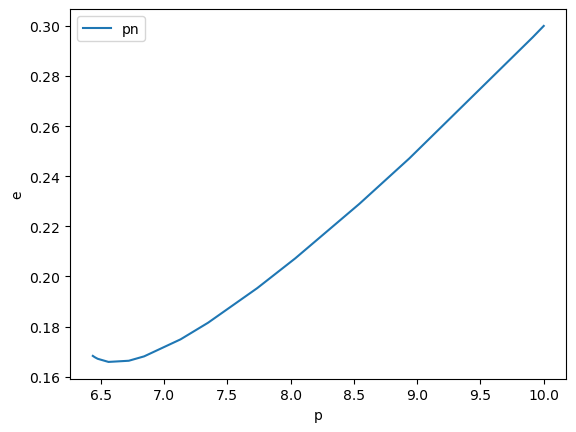

In [29]:
M = 1e6
mu = 1e1
p0 = 10.0
e0 = 0.3
T = 2.0
beta = 0.0 # we provided a new parameter

# define the trajectory
traj_new = PnTrajectory()

zero_beta = traj_new(M, mu, 0.0, p0, e0, 1.0, beta, T=T, dt=10.0)

p = zero_beta[1]
e = zero_beta[2] 

plt.plot(p, e, label='pn')
plt.ylabel('e')
plt.xlabel('p')

plt.legend()

### Exercise 8
Create a new trajectory with new derivative functions. Define two new classes for the trajectory and the derivatives (copy the construction of the classes `class PN`, `class PnTrajectory(TrajectoryBase)`). Modify the fluxes for `pdot,edot` to account for a new dissipation in the trajectory, i.e. 
```
pdot = (...) * ( 1 + self.par * p )
edot = (...) * ( 1 + self.par * e )
```
where the dots indicate the previous fluxes due to GW emission. Make sure that the new trajectory class uses the new derivative class and  study how these new trajectories differ from the previous ones as a function of `beta`.

### Make a waveform model
Now we will create a waveform with our new trajectory model. To do this, we will start with [SchwarzschildEccentricWaveformBase](https://mikekatz04.github.io/FastEMRIWaveforms/html/user/main.html#few.waveform.SchwarzschildEccentricWaveformBase). This base class has already inherited from [SchwarzschildEccentric](https://mikekatz04.github.io/FastEMRIWaveforms/html/user/main.html#few.utils.baseclasses.SchwarzschildEccentric). It creates the common interface for all waveform modules (and how they interface with there constituent modules). A requirement when creating a module is to have properties describing the GPU capability of the waveform, as well as whether or not it allows for batching the waveform creation (after trajectory).  

In [30]:
class FastSchwarzschildEccentricPn(SchwarzschildEccentricWaveformBase):
    def __init__(
        self,
        inspiral_kwargs={},
        amplitude_kwargs={},
        sum_kwargs={},
        Ylm_kwargs={},
        use_gpu=False,
        *args,
        **kwargs
    ):

        SchwarzschildEccentricWaveformBase.__init__(
            self,
            PnTrajectory, # here it is the new trajectory!
            RomanAmplitude,
            InterpolatedModeSum,
            inspiral_kwargs=inspiral_kwargs,
            amplitude_kwargs=amplitude_kwargs,
            sum_kwargs=sum_kwargs,
            Ylm_kwargs=Ylm_kwargs,
            use_gpu=use_gpu,
            *args,
            **kwargs
        )

    @property
    def gpu_capability(self):
        return True

    @property
    def allow_batching(self):
        return False

{'Phi_phi0': 0.0, 'Phi_theta0': 0.0, 'Phi_r0': 0.0, 'dt': 15.0, 'max_init_len': 1000, 'err': 1e-10, 'DENSE_STEPPING': 0, 'use_rk4': False}


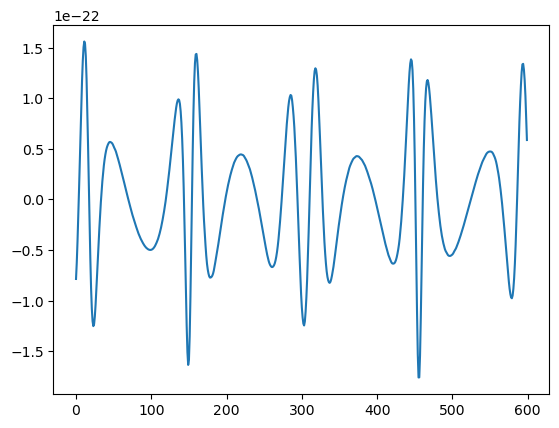

In [31]:
test = FastSchwarzschildEccentricPn()

M = 1e6
mu = 1e1
p0 = 12.0
e0 = 0.4
theta = np.pi/3.
phi = np.pi/4.
dist = 1.0
beta =0.0

T = 0.02
dt = 15.0

wave1 = test(M, mu, p0, e0, theta, phi, beta, dist=dist, dt=dt, T=T)

plt.plot(wave1.real[-600:])

### Exercise 9
Use the new trajectory from the previous exercise to study how the waveform changes for different values of  `beta`. Compute the overlap as a function of `beta`

## Citing waveforms and modules

If you use any work from this package please cite our papers [arxiv.org/2104.04582](https://arxiv.org/abs/2104.04582) and [arxiv.org/2008.06071](https://arxiv.org/abs/2008.06071). Additionally please cite any additional work for each module used by calling the `citation` attribute on the module class:

### Fast Schwarzschild Eccentric Waveforms

In [32]:
wave = FastSchwarzschildEccentricFlux()
print(wave.citation)


@article{Katz:2021yft,
    author = "Katz, Michael L. and Chua, Alvin J. K. and Speri, Lorenzo and Warburton, Niels and Hughes, Scott A.",
    title = "{FastEMRIWaveforms: New tools for millihertz gravitational-wave data analysis}",
    eprint = "2104.04582",
    archivePrefix = "arXiv",
    primaryClass = "gr-qc",
    month = "4",
    year = "2021"
}

@article{Chua:2020stf,
    author = "Chua, Alvin J. K. and Katz, Michael L. and Warburton, Niels and Hughes, Scott A.",
    title = "{Rapid generation of fully relativistic extreme-mass-ratio-inspiral waveform templates for LISA data analysis}",
    eprint = "2008.06071",
    archivePrefix = "arXiv",
    primaryClass = "gr-qc",
    doi = "10.1103/PhysRevLett.126.051102",
    journal = "Phys. Rev. Lett.",
    volume = "126",
    number = "5",
    pages = "051102",
    year = "2021"
}

@software{michael_l_katz_2020_4005001,
  author       = {Michael L. Katz and
                  Alvin J. K. Chua and
                  Niels Warburton and
 

### New and Improved AAK with 5PN Trajectory

In [33]:
wave_aak = Pn5AAKWaveform()
print(wave_aak.citation)


@article{Katz:2021yft,
    author = "Katz, Michael L. and Chua, Alvin J. K. and Speri, Lorenzo and Warburton, Niels and Hughes, Scott A.",
    title = "{FastEMRIWaveforms: New tools for millihertz gravitational-wave data analysis}",
    eprint = "2104.04582",
    archivePrefix = "arXiv",
    primaryClass = "gr-qc",
    month = "4",
    year = "2021"
}

@article{Chua:2020stf,
    author = "Chua, Alvin J. K. and Katz, Michael L. and Warburton, Niels and Hughes, Scott A.",
    title = "{Rapid generation of fully relativistic extreme-mass-ratio-inspiral waveform templates for LISA data analysis}",
    eprint = "2008.06071",
    archivePrefix = "arXiv",
    primaryClass = "gr-qc",
    doi = "10.1103/PhysRevLett.126.051102",
    journal = "Phys. Rev. Lett.",
    volume = "126",
    number = "5",
    pages = "051102",
    year = "2021"
}

@software{michael_l_katz_2020_4005001,
  author       = {Michael L. Katz and
                  Alvin J. K. Chua and
                  Niels Warburton and
 

### Ex 8

{'dt': 10.0, 'max_init_len': 1000, 'err': 1e-10, 'DENSE_STEPPING': 0, 'use_rk4': False}


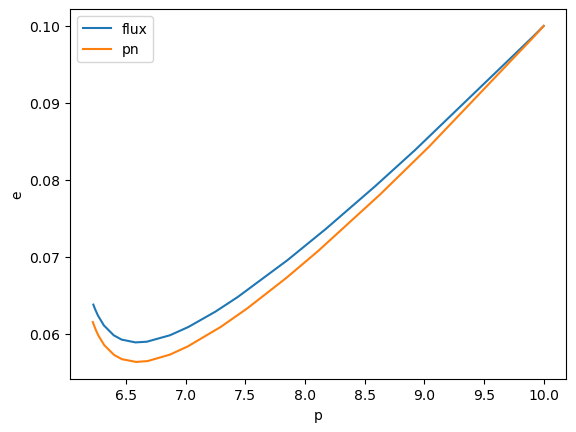

In [34]:
class BeyondPN:
    def __init__(self, epsilon, *args):
        self.epsilon = epsilon
        self.par = args[0] # additional parameter

    def __call__(self, t, y):

        # mass ratio
        epsilon = self.epsilon

        # extract the four evolving parameters
        p, e, Phi_phi, Phi_r = y

        
        # guard against bad integration steps
        if e >= 1.0 or e < 1e-6 or p < 6.0 or (p - 6 - 2* e) < 0.1:
            return [0.0, 0.0, 0.0, 0.0]
        
        # perform elliptic calculations
        EllipE = ellipe(4*e/(p-6.0+2*e))
        EllipK = ellipk(4*e/(p-6.0+2*e))
        EllipPi1 = ellippi(16*e/(12.0 + 8*e - 4*e*e - 8*p + p*p), 4*e/(p-6.0+2*e))
        EllipPi2 = ellippi(2*e*(p-4)/((1.0+e)*(p-6.0+2*e)), 4*e/(p-6.0+2*e))

        # Azimuthal frequency
        Omega_phi = (2*Power(p,1.5))/(Sqrt(-4*Power(e,2) + Power(-2 + p,2))*(8 + ((-2*EllipPi2*(6 + 2*e - p)*(3 + Power(e,2) - p)*Power(p,2))/((-1 + e)*Power(1 + e,2)) - (EllipE*(-4 + p)*Power(p,2)*(-6 + 2*e + p))/(-1 + Power(e,2)) +
              (EllipK*Power(p,2)*(28 + 4*Power(e,2) - 12*p + Power(p,2)))/(-1 + Power(e,2)) + (4*(-4 + p)*p*(2*(1 + e)*EllipK + EllipPi2*(-6 - 2*e + p)))/(1 + e) + 2*Power(-4 + p,2)*(EllipK*(-4 + p) + (EllipPi1*p*(-6 - 2*e + p))/(2 + 2*e - p)))/
            (EllipK*Power(-4 + p,2))))

        # Post-Newtonian calculations
        yPN = Power(Omega_phi,2./3.)

        EdotPN = (96 + 292*Power(e,2) + 37*Power(e,4))/(15.*Power(1 - Power(e,2),3.5)) * pow(yPN, 5)
        LdotPN = (4*(8 + 7*Power(e,2)))/(5.*Power(-1 + Power(e,2),2)) * pow(yPN, 7./2.)

        # flux: here I modified the fluxes with the new parameter
        Edot = -epsilon*(EdotPN) 
        Ldot = -epsilon*(LdotPN)


        # time derivatives
        pdot = (-2*(Edot*Sqrt((4*Power(e,2) - Power(-2 + p,2))/(3 + Power(e,2) - p))*(3 + Power(e,2) - p)*Power(p,1.5) + Ldot*Power(-4 + p,2)*Sqrt(-3 - Power(e,2) + p)))/(4*Power(e,2) - Power(-6 + p,2))
        edot = -((Edot*Sqrt((4*Power(e,2) - Power(-2 + p,2))/(3 + Power(e,2) - p))*Power(p,1.5)*(18 + 2*Power(e,4) - 3*Power(e,2)*(-4 + p) - 9*p + Power(p,2)) +(-1 + Power(e,2))*Ldot*Sqrt(-3 - Power(e,2) + p)*(12 + 4*Power(e,2) - 8*p + Power(p,2)))/(e*(4*Power(e,2) - Power(-6 + p,2))*p))
        
        pdot *= 1 + self.par * p
        edot *= 1 + self.par * e
        
        Phi_phi_dot = Omega_phi;

        Phi_r_dot = (p*Sqrt((-6 + 2*e + p)/(-4*Power(e,2) + Power(-2 + p,2)))*Pi)/(8*EllipK + ((-2*EllipPi2*(6 + 2*e - p)*(3 + Power(e,2) - p)*Power(p,2))/((-1 + e)*Power(1 + e,2)) - (EllipE*(-4 + p)*Power(p,2)*(-6 + 2*e + p))/(-1 + Power(e,2)) +
        (EllipK*Power(p,2)*(28 + 4*Power(e,2) - 12*p + Power(p,2)))/(-1 + Power(e,2)) + (4*(-4 + p)*p*(2*(1 + e)*EllipK + EllipPi2*(-6 - 2*e + p)))/(1 + e) + 2*Power(-4 + p,2)*(EllipK*(-4 + p) + (EllipPi1*p*(-6 - 2*e + p))/(2 + 2*e - p)))/Power(-4 + p,2))

        dydt = [pdot, edot, Phi_phi_dot, Phi_r_dot]

        return dydt

# this is the actual class that implements a PN trajectory. It uses the PN class in the integrator.
class BeyondPnTrajectory(TrajectoryBase):
    
    # for common interface with *args and **kwargs
    def __init__(self, *args, **kwargs):
        pass
    
    # required by the trajectory base class
    def get_inspiral(self, M, mu, a, p0, e0, x0, *args, T=1.0, **kwargs):

        # set up quantities and integrator
        y0 = [p0, e0, 0.0, 0.0]

        # dimensionless final time
        T = T * YRSID_SI / (M * MTSUN_SI)
        
        # factor to convert back to seconds
        Msec = M * MTSUN_SI
        
        # mass ratio
        epsilon = mu/M
        
        # we define the right hand side of the ODE
        rhs = BeyondPN(epsilon, *args)
        
        # scipy integrator
        integrator = DOP853(rhs, 0.0, y0, T, atol=1e-10,rtol=1e-6)

        t_out, p_out, e_out = [], [], []
        Phi_phi_out, Phi_r_out = [], []
        t_out.append(0.0)
        p_out.append(p0)
        e_out.append(e0)
        Phi_phi_out.append(0.0)
        Phi_r_out.append(0.0)

        # run the integrator down to T or separatrix
        run = True
        while integrator.t < T and run:
            
            integrator.step()

            p, e, Phi_phi, Phi_r = integrator.y
            t_out.append(integrator.t * Msec)
            p_out.append(p)
            e_out.append(e)
            Phi_phi_out.append(Phi_phi)
            Phi_r_out.append(Phi_r)

            if (p - 6 -2*e) < 0.1:
                run = False

        # read out data. It must return length 6 tuple
        t = np.asarray(t_out)
        p = np.asarray(p_out)
        e = np.asarray(e_out)
        Phi_phi = np.asarray(Phi_phi_out)
        Phi_r = np.asarray(Phi_r_out)
        
        # need to add polar info 
        Phi_theta = Phi_phi.copy()  # by construction
        x = np.ones_like(Phi_theta)

        return (t, p, e, x, Phi_phi, Phi_theta, Phi_r)

M = 1e6
mu = 1e1
p0 = 10.0
e0 = 0.1
T = 2.0
beta = 0.0 # we provided a new parameter

# define the trajectory
traj_new = PnTrajectory()

zero_beta = traj_new(M, mu, 0.0, p0, e0, 1.0, beta, T=T, dt=10.0)

p = zero_beta[1]
e = zero_beta[2] 

# new traj
beyond_traj = BeyondPnTrajectory()
beta=1e-2
nonzero_beta = beyond_traj(M, mu, 0.0, p0, e0, 1.0, beta, T=T, dt=10.0)

plt.plot(nonzero_beta[1], nonzero_beta[2], label='flux')
plt.plot(p, e, label='pn')
plt.ylabel('e')
plt.xlabel('p')

plt.legend()

In [35]:
class FastSchwarzschildEccentricPn(SchwarzschildEccentricWaveformBase):
    def __init__(
        self,
        inspiral_kwargs={},
        amplitude_kwargs={},
        sum_kwargs={},
        Ylm_kwargs={},
        use_gpu=False,
        *args,
        **kwargs
    ):

        SchwarzschildEccentricWaveformBase.__init__(
            self,
            BeyondPnTrajectory, # here it is the new trajectory!
            RomanAmplitude,
            InterpolatedModeSum,
            inspiral_kwargs=inspiral_kwargs,
            amplitude_kwargs=amplitude_kwargs,
            sum_kwargs=sum_kwargs,
            Ylm_kwargs=Ylm_kwargs,
            use_gpu=use_gpu,
            *args,
            **kwargs
        )

    @property
    def gpu_capability(self):
        return True

    @property
    def allow_batching(self):
        return False

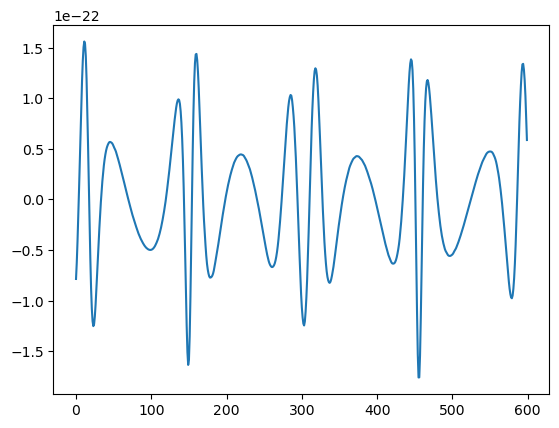

In [36]:
test = FastSchwarzschildEccentricPn()

M = 1e6
mu = 1e1
p0 = 12.0
e0 = 0.4
theta = np.pi/3.
phi = np.pi/4.
dist = 1.0
beta =0.0

T = 0.02
dt = 15.0

wave1 = test(M, mu, p0, e0, theta, phi, beta, dist=dist, dt=dt, T=T)

plt.plot(wave1.real[-600:])